# Medical Diagonis with Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/heartdisease.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [18]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
diagnosis_distribution = data['target'].value_counts()
diagnosis_distribution

1    165
0    138
Name: target, dtype: int64

In [21]:
# Calculate prior probabilities
condition_prob = diagnosis_distribution[1] / len(data)
no_condition_prob = diagnosis_distribution[0] / len(data)

In [22]:
condition_prob,no_condition_prob

(0.5445544554455446, 0.45544554455445546)

In [4]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size =0.25,random_state = 2)

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
# Gaussian Naive Baye

gauss_nb = GaussianNB()
gauss_nb.fit(xtrain,ytrain)

ypred = gauss_nb.predict(xtest)

C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# performance metric

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Accuracy score :	 0.8947368421052632

Confusion Martix :
 [[32  4]
 [ 4 36]]

classification Report :
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.90      0.90      0.90        40

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



<Axes: >

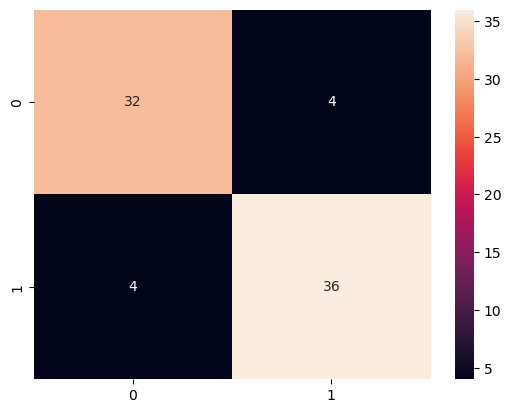

In [10]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [24]:
# Multinomial Naive Baye

from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(xtrain,ytrain)

ypred = multi_nb.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Accuracy score :	 0.8157894736842105

Confusion Martix :
 [[27  9]
 [ 5 35]]

classification Report :
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.80      0.88      0.83        40

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

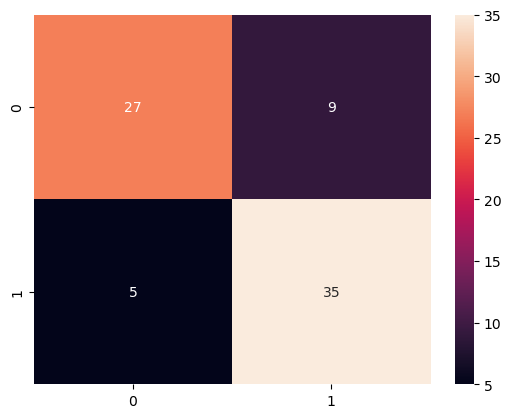

In [25]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [26]:
#Bernoulli  Naive Baye

from sklearn.naive_bayes import BernoulliNB

ber_nb = BernoulliNB()
ber_nb.fit(xtrain,ytrain)

ypred = ber_nb.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Accuracy score :	 0.868421052631579

Confusion Martix :
 [[29  7]
 [ 3 37]]

classification Report :
               precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.84      0.93      0.88        40

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# MODEL COMPARISION

# Gaussian Naive Bayes has more than Multinominal and Bernoulli

In [36]:
# Laplace Smoothing

multi_smoothing = MultinomialNB(alpha=.001)
multi_smoothing.fit(xtrain,ytrain)

ypred = multi_smoothing.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

Accuracy score :	 0.8157894736842105

Confusion Martix :
 [[27  9]
 [ 5 35]]

classification Report :
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        36
           1       0.80      0.88      0.83        40

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



C:\Users\2001s\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
.............. laplace smoothing with multnomial has no effect ..............

# 

# 

# Customer Segmentation with K-Nearest Neighbors (KNN)

In [37]:
data = pd.read_csv('data/customer_data.csv')
data.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [39]:
x = data[['age','income','purchase_frequency']]

In [41]:
# create segments for each customer...

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Create an instance of the KMeans clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=0)  # Choosing 3 clusters for demonstration

# Fit the KMeans model
kmeans.fit(x_scaled)

# Get the cluster labels for each customer
data['segment'] = kmeans.labels_

In [44]:
data.head()

,name,age,gender,education,income,country,purchase_frequency,spending,segment
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120,1
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040,0
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115,2
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510,2
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780,1


In [46]:
y = data['segment']

In [48]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size =0.25,random_state = 2)

In [50]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=3)

print('<--------------------KNN Classifier model------------------>')
knn_model.fit(xtrain,ytrain)
ypred = knn_model.predict(xtest)

# performance metric

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

<--------------------KNN Classifier model------------------>
Accuracy score :	 0.976

Confusion Martix :
 [[101   2   1]
 [  1  72   0]
 [  2   0  71]]

classification Report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       104
           1       0.97      0.99      0.98        73
           2       0.99      0.97      0.98        73

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



<Axes: >

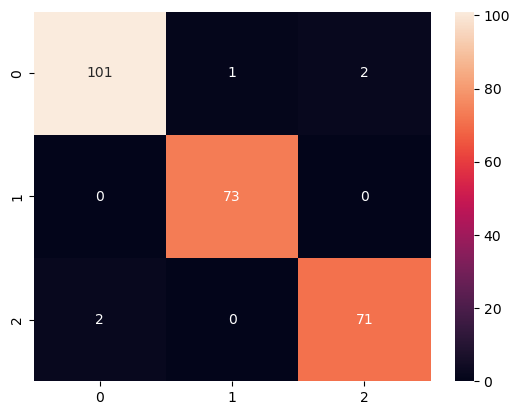

In [63]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d')

In [61]:
# Hyperparameter Tuning

knn_model = KNeighborsClassifier(n_neighbors=17)

print('<--------------------KNN Classifier model after tuning------------------>')
knn_model.fit(xtrain,ytrain)
ypred = knn_model.predict(xtest)

print("Accuracy score :\t",accuracy_score(ytest,ypred))
print()
print('Confusion Martix :\n',confusion_matrix(ytest,ypred))
print()
print('classification Report :\n', classification_report(ytest,ypred))

<--------------------KNN Classifier model after tuning------------------>
Accuracy score :	 0.98

Confusion Martix :
 [[101   1   2]
 [  0  73   0]
 [  2   0  71]]

classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       104
           1       0.99      1.00      0.99        73
           2       0.97      0.97      0.97        73

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



<Axes: >

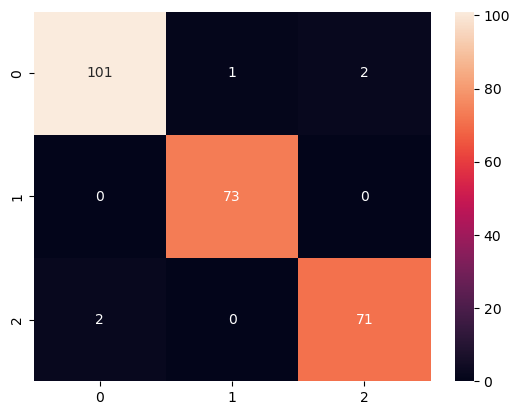

In [64]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d')